#Análisis de datos médicos con aprendizaje no supervisado
###José Antonio Juárez Pacheco A00572186
###Mayra Sarahí de Luna Castillo A01635774
###Raúl Pérez A01566937

##Búsqueda de una base de datos médicos o experimentales

Busca un conjunto de datos con la cual puedas llevar a cabo tu proyecto. Para ello, se te sugiere cualquiera de las dos alternativas:

- En el sitio Kaggle. selecciona una base de datos relacionada a la salud a la cuál se le pueda aplicar modelos de agrupamiento.
- Algún conjunto de datos que obtivista en tu proyecto anterior de este curso (por ejemplo, el de tareas cognitivas).

¿Por qué consideran que la base de datos que seleccionaron es adecuada para agrupamiento?

In [ ]:
#f<rom google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from math import sqrt

# clustering methods
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage

# Metrics for evaluating clustering results
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.stats import f_oneway

# Distance metrics
from sklearn.metrics import pairwise_distances

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
def plot_data(points, labels, title):
    fig = plt.figure()
    if points.shape[1] > 2:
        ax = fig.add_subplot(projection='3d')
        ax.scatter(points[:,0], points[:,1], points[:,2], c=labels, cmap='viridis')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(title)
    else:
        plt.scatter(points[:,0], points[:,1], c=labels, cmap='viridis')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)

    plt.show()

##Base de datos seleccionada: Breast Cancer Wisconsin (Diagnostic) Data Set

In [ ]:
df = pd.read_csv("/content/data 2 (1)(1).csv")

df.drop("diagnosis", axis=1, inplace=True)
df = df.dropna(axis=1)
data = StandardScaler().fit_transform(df)

df.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


¿Por qué consideran que la base de datos que seleccionaron es adecuada para agrupamiento?

Escogí esta base de datos por varias razones. La primera es que tiene alrededor de 30 columnas o características diferentes, esta variedad de características proporciona una amplia gama de información que podré usar para identificar patrones y agrupar las muestras que me pueden ayudar a identificar subtipos de cáncer de mama con características similares. Así mismo, tiene una clasificación binaria en la columna diagnosis lo que permite evaluar y validar los resultados de los métodos de agrupamiento. Finalmente, es una base de datos que cuenta con demasiadas muestras por lo que es una base sólida de datos que dan más seguridad a los métodos de agrupamiento

##Búsqueda de patrones con modelos de agrupamiento

- Utiliza el algoritmo k-medias para buscar posibles grupos de observaciones en la base de datos que seleccionaron. ¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos? ¿Qué han descubierto al analizar los grupos?
- Utiliza otros dos algoritmos de agrupamiento distintos a k-medias y agrupamiento jerárquico, y repite el paso anterior.

Notas:
- No olviden investigar el número óptimo de clústeres para cada uno de los métodos utilizados empleando alguna de las técnicas vistas en clase.
- Si no es posible utilizar k-medias por el tipo de datos manejado en la base de datos seleccionada, pueden utilizar agrupamiento jerárquico.

###Método 1 para definir clusters

La puntuación de silhouette para 2 clusters: 0.338
La puntuación de silhouette para 3 clusters: 0.307
La puntuación de silhouette para 4 clusters: 0.274
La puntuación de silhouette para 5 clusters: 0.154
La puntuación de silhouette para 6 clusters: 0.145
La puntuación de silhouette para 7 clusters: 0.147
La puntuación de silhouette para 8 clusters: 0.136
La puntuación de silhouette para 9 clusters: 0.135
La puntuación de silhouette para 10 clusters: 0.129


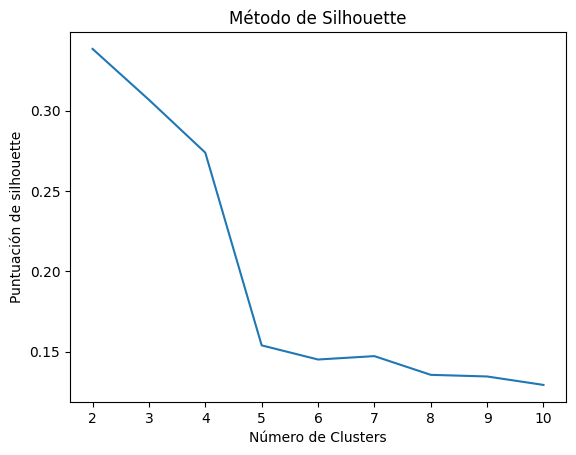

In [ ]:
data = StandardScaler().fit_transform(df)
silhouette_scores = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
  kmeans.fit(data)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(data, labels)
  silhouette_scores.append(silhouette_avg)
  print("La puntuación de silhouette para", k, "clusters:", round(silhouette_avg, 3))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silhouette')
plt.title('Método de Silhouette')
plt.show()

###Método 2 para definir clusters


Para k = 1, el sse es: 17639.0

Para k = 2, el sse es: 12162.85

Para k = 3, el sse es: 10627.86

Para k = 4, el sse es: 9824.32

Para k = 5, el sse es: 9120.93

Para k = 6, el sse es: 8524.89

Para k = 7, el sse es: 8098.06

Para k = 8, el sse es: 7692.46

Para k = 9, el sse es: 7489.8

Para k = 10, el sse es: 7150.26


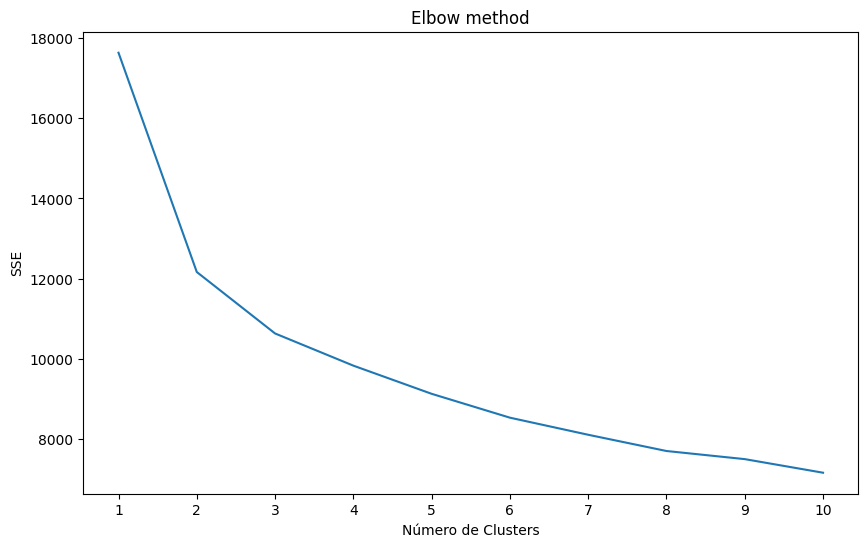

In [ ]:
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)
  print(f"\nPara k = {k}, el sse es: {round(sse[-1],2)}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Elbow method')
plt.show()

Como podemos observar en estos dos métodos, la mejor opción sería que se usen 2 clusters para hacer el Kmeans, ya que tiene el mejor porcentaje o índice en el método de silhouette. Así mismo, podemos como en el elbow method, en el punto 2 hace el mayor quiebre por lo que esto significa que la mejor opción es que haya 2 cluster para el kmeans.

####Algoritmo de agrupación K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


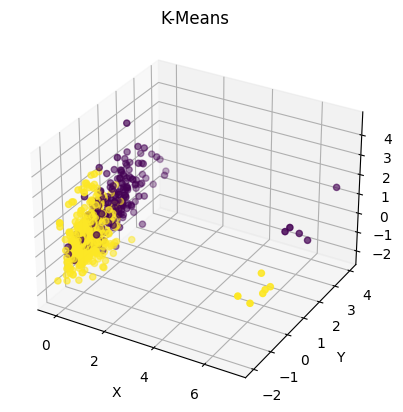

In [ ]:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters).fit(data)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_
plot_data(data, clustering_labels, 'K-Means')

#### Búsqueda de patrones

**¿Qué preguntas consideran importantes que pueden responder con agrupamiento para esa base de datos?**

Algunas preguntas importantes para plantearnos en en análisis de esta base de datos en específico son:

¿Existen grupos claramente separados que representen diferentes tipos de tumores benignos y malignos?

¿Qué características son las más discriminativas para distinguir entre tumores benignos y malignos?

¿Hay algún grupo con un alto riesgo de malignidad basado en las características de los tumores?

¿Existen subgrupos dentro de los tumores malignos que muestren características particulares?

**¿Qué han descubierto al analizar los grupos?**

Para hacer un análisis más a fondo, aplicaremos la técnica del PCA. Es una técnica de reducción de dimensionalidad utilizada para extraer las características más importantes o relevantes de un conjunto de datos. Transforma un conjunto de variables correlacionadas en un conjunto de variables no correlacionadas llamadas componentes principales. Esto servirá para visualizar los grupos en una dimensión menor que es más comprensible y veremos el comportamiento de los grupos.


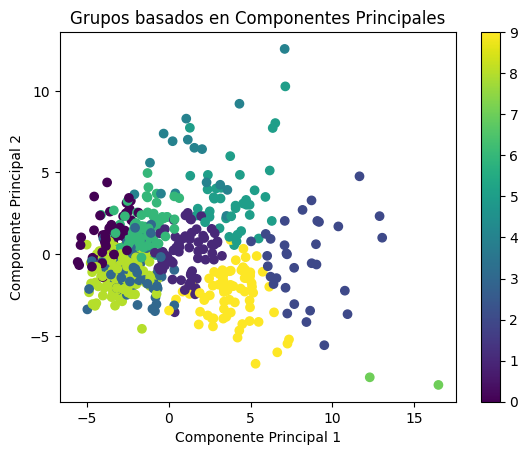

In [ ]:
# Aplicar PCA a los datos
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

# Crear un scatter plot de los grupos en función de las componentes principales
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Grupos basados en Componentes Principales')
plt.colorbar()
plt.show()

####Encontramos clusters óptimos para Gaussian Mixture Model

La puntuación de silhouette para 2 clusters: 0.308
La puntuación de silhouette para 3 clusters: 0.241
La puntuación de silhouette para 4 clusters: 0.124
La puntuación de silhouette para 5 clusters: 0.118
La puntuación de silhouette para 6 clusters: 0.11
La puntuación de silhouette para 7 clusters: 0.118
La puntuación de silhouette para 8 clusters: 0.11
La puntuación de silhouette para 9 clusters: 0.117
La puntuación de silhouette para 10 clusters: 0.109
La puntuación de silhouette para 11 clusters: 0.112
La puntuación de silhouette para 12 clusters: 0.111


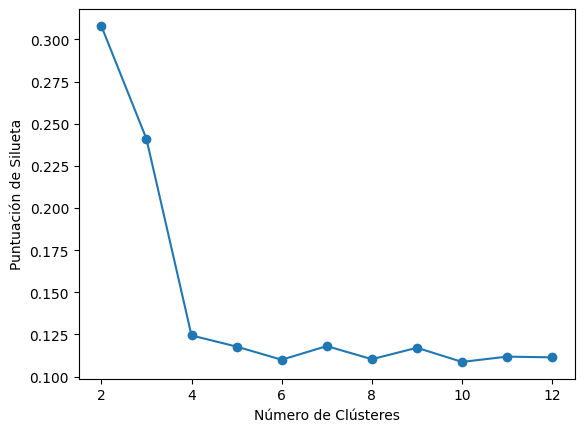

Número óptimo de clústeres: 2


In [ ]:
data = StandardScaler().fit_transform(df)
# Prueba diferentes números de clústeres y calcula la puntuación de silueta
min_clusters = 2
max_clusters = 12
n_clusters_range = range(min_clusters, max_clusters+1)
silhouette_scores = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(data)
    labels = gmm.predict(data)
    silhouette_scores.append(silhouette_score(data, labels))
    print("La puntuación de silhouette para", n_clusters, "clusters:", round(silhouette_score(data,labels),3))

# Graficar la puntuación de silueta en función del número de clústeres
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clústeres')
plt.ylabel('Puntuación de Silueta')
plt.show()

# Obtener el número óptimo de clústeres que maximiza la puntuación de silueta
best_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]
print("Número óptimo de clústeres:", best_n_clusters)



####Algoritmo de agrupación Gaussian Model Mixture

----- Gaussian Model Mixture -----
Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1

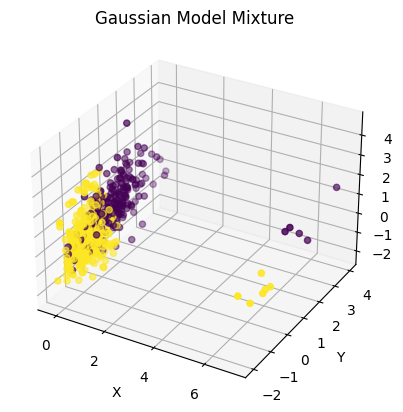

In [ ]:
print('----- Gaussian Model Mixture -----')
gmm = GaussianMixture(n_components=2).fit(data)
labels = gmm.predict(data)
print('Labels: ', labels)
plot_data(data, labels, 'Gaussian Model Mixture')

####Encontramos clusters óptimos para Spectral Clustering. Método Silhouette

La puntuación de silhouette para 2 clusters: 0.666
La puntuación de silhouette para 3 clusters: 0.516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 4 clusters: 0.666


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 5 clusters: 0.516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 6 clusters: 0.516


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 7 clusters: 0.514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 8 clusters: 0.653


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 9 clusters: 0.514


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  est = KMeans(


La puntuación de silhouette para 10 clusters: 0.097


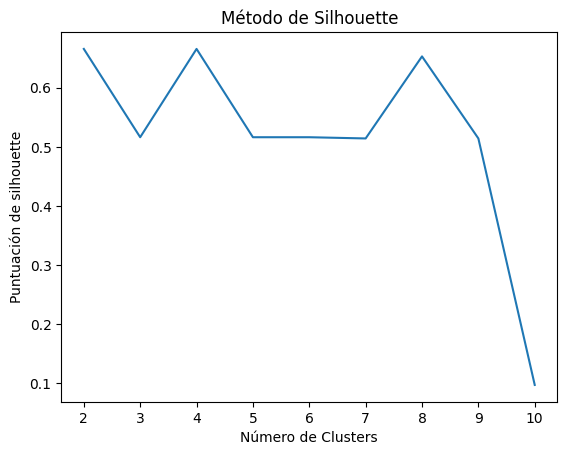

In [ ]:
data = StandardScaler().fit_transform(df)
silhouette_scores = []
for k in range(2, 11):
  SpectralC = SpectralClustering(n_clusters=k, random_state=42, n_init=10)
  SpectralC.fit(data)
  labels = SpectralC.labels_
  silhouette_avg = silhouette_score(data, labels)
  silhouette_scores.append(silhouette_avg)
  print("La puntuación de silhouette para", k, "clusters:", round(silhouette_avg, 3))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de silhouette')
plt.title('Método de Silhouette')
plt.show()

En la gráfica podemos ver que los números óptimos de clusters según el módelo de silhouette pueden ser el 2, 4 y 8. Podemos escoger el que queramos de estos 3, vamos a hacer la función con los 3 valores

####Algoritmo de agrupación Spectral Clustering

----- Spectral clustering k=2 -----


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

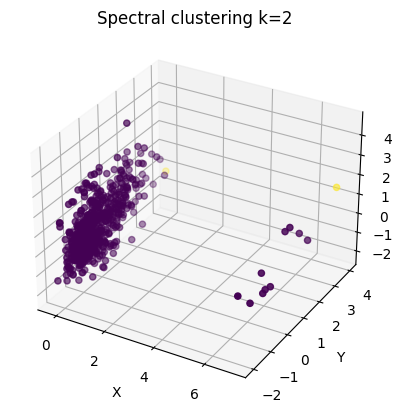

In [ ]:
print('----- Spectral clustering k=2 -----')
spectral = SpectralClustering(n_clusters=4).fit(data)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(data, clustering_labels, 'Spectral clustering k=2')

----- Spectral clustering k=4 -----


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


Labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

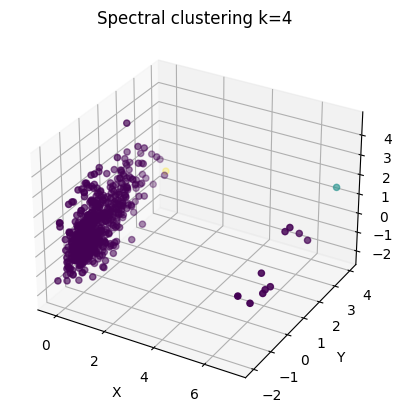

In [ ]:
print('----- Spectral clustering k=4 -----')
spectral = SpectralClustering(n_clusters=4).fit(data)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(data, clustering_labels, 'Spectral clustering k=4')

----- Spectral clustering k=6 -----


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  est = KMeans(


Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 3 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1

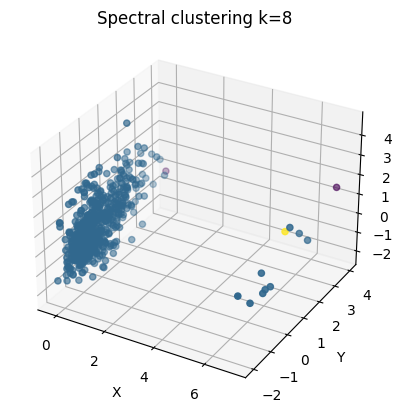

In [ ]:
print('----- Spectral clustering k=6 -----')
spectral = SpectralClustering(n_clusters=4).fit(data)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)
plot_data(data, clustering_labels, 'Spectral clustering k=8')